Skewness: 1.882876


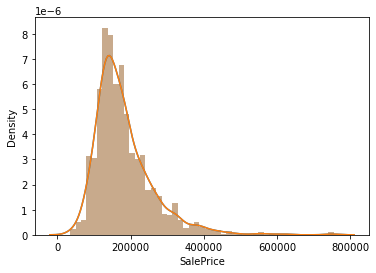

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
warnings.filterwarnings('ignore')

df_train = pd.read_csv('./dataset/train.csv')

##print(df_train['SalePrice'].describe())

sns.distplot([df_train['SalePrice']])

# scatter plot grlivarea / saleprice

sns.distplot(df_train['SalePrice']);

print("Skewness: %f" % df_train['SalePrice'].skew())








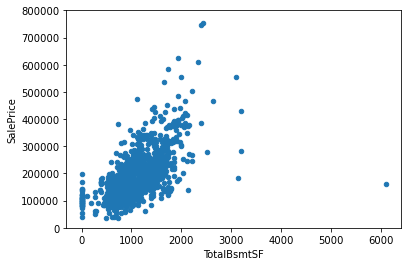

In [2]:


#scatter plot total bsmtsf /saleprice

var = 'TotalBsmtSF'

data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


(-0.5, 9.5, 0.0, 800000.0)

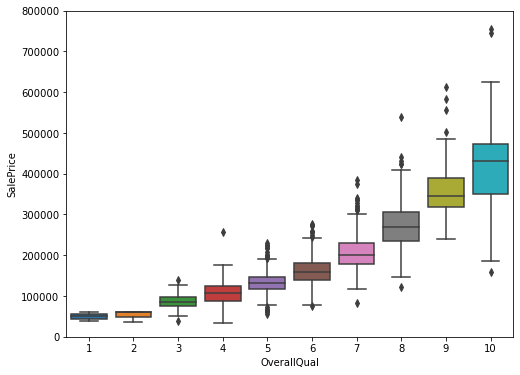

In [3]:
# box plot overallqual / saleprice

var = 'OverallQual'

data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

f, ax = plt.subplots(figsize=(8,6))

fig = sns.boxplot(x=var , y="SalePrice",data=data)

fig.axis(ymin=0,ymax=800000)


(-0.5, 111.5, 0.0, 800000.0)

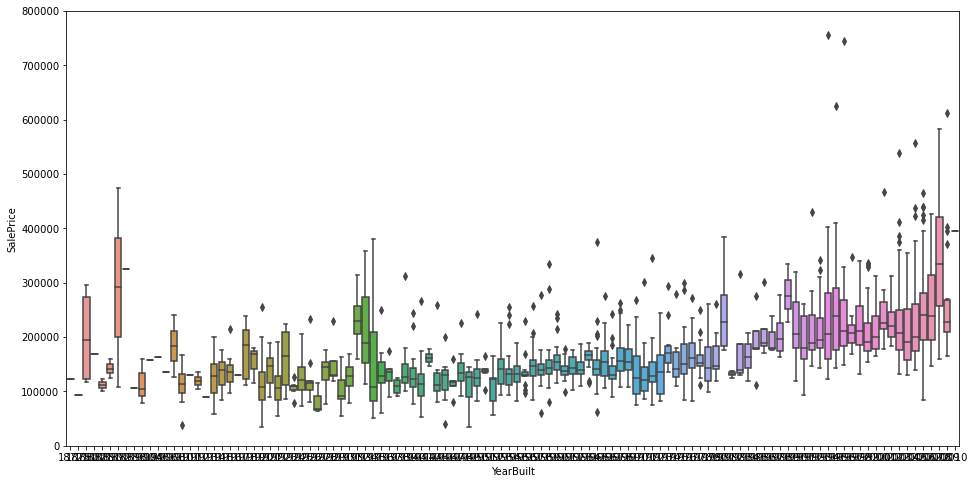

In [4]:


# box plot year built  / saleprice


var = 'YearBuilt'

data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)



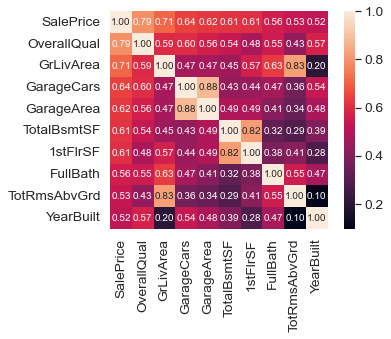

In [5]:
#'SalePrice' correlation matrix 



#saleprice correlation matrix
k = 10 #number of variables for heatmap

corrmat = df_train.corr()

cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


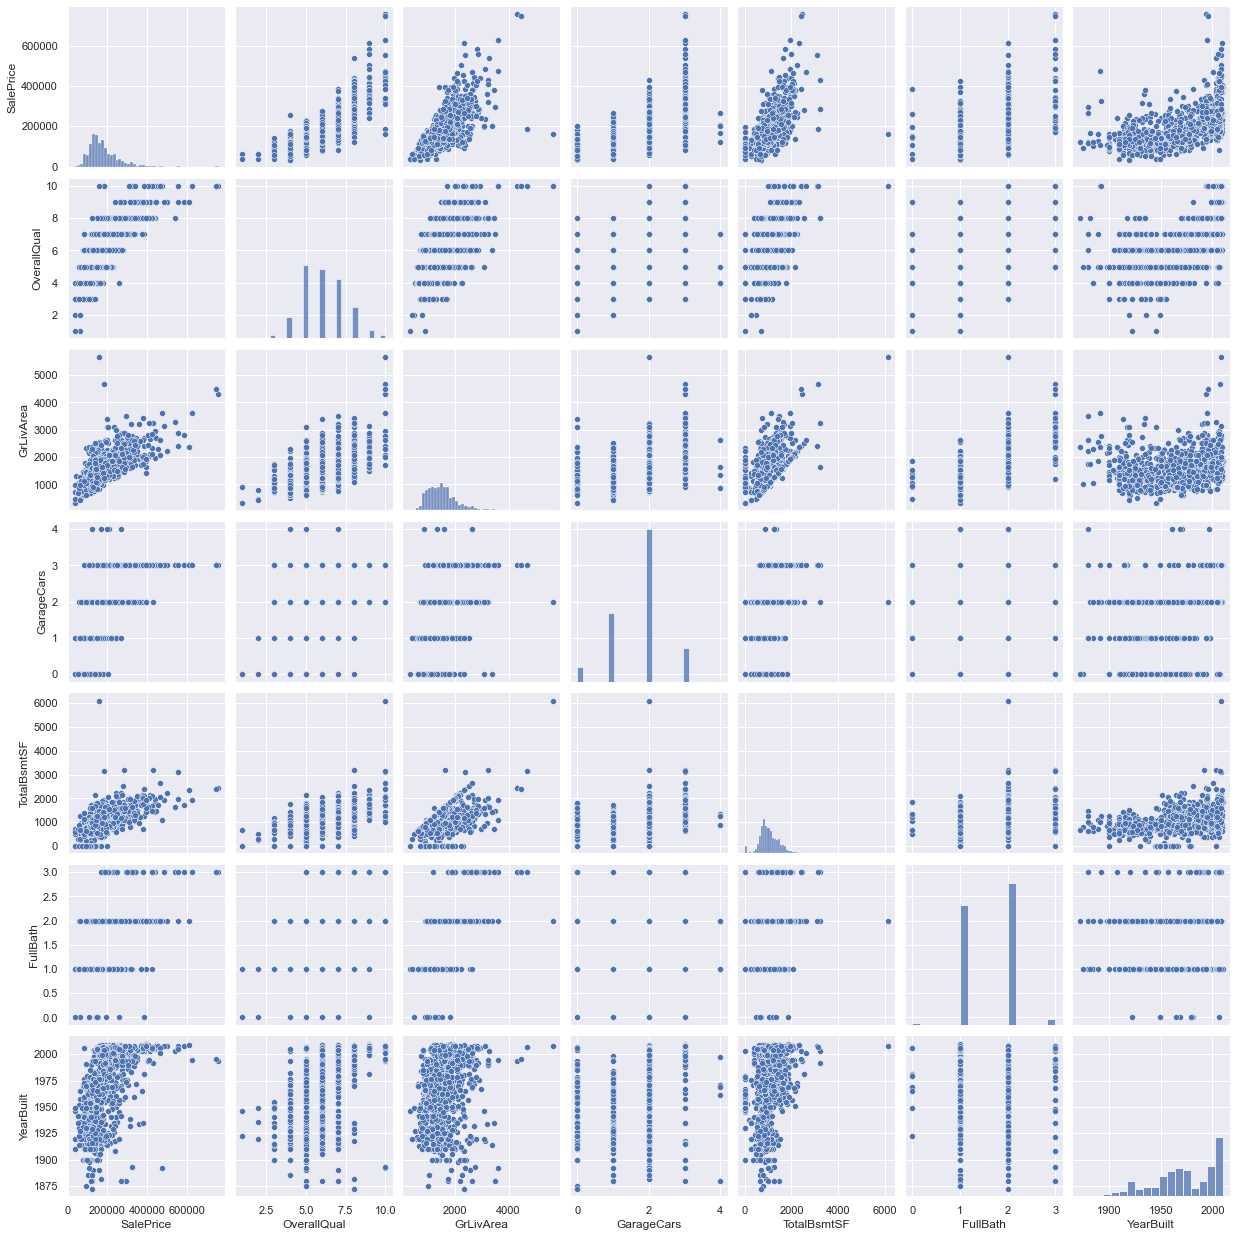

In [6]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(df_train[cols],size=2.5)
plt.show()

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [8]:

#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] >= 1]).index,1)

#df_train = df_train.drop(missing_data[df_train['Electrical'].isnull()].index)

df_train.isnull().sum().max() #just checking that there's no missing data missing...


0

In [9]:
# IQR
Q1 = np.percentile(df_train['SalePrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_train['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_train.shape)
 
# Upper bound
upper = np.where(df_train['SalePrice'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_train['SalePrice'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_train.drop(upper[0], inplace = True)
df_train.drop(lower[0], inplace = True)
print(df_train.shape)

Old Shape:  (1460, 62)
(1399, 62)


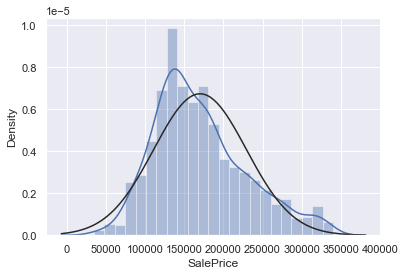

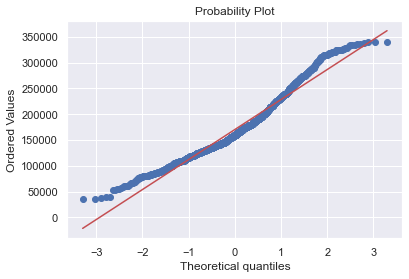

In [10]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

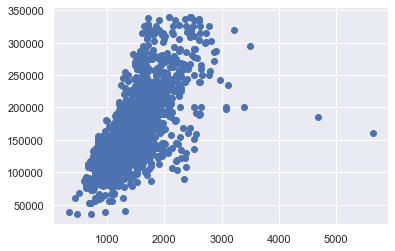

In [11]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split

In [13]:
y = df_train.SalePrice
predictor_cols = [ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Create training predictors data
X = df_train[predictor_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

my_model = XGBRegressor(n_estimators=450, max_depth=5, learning_rate=0.01) #the params were tuned using xgb.cv


my_model.fit(X_train, y_train, verbose=False)

print("XGBRegressor train score:",my_model.score(X_train,y_train))
print("XGBRegressor test score:",my_model.score(X_test,y_test))




XGBRegressor train score: 0.9297239368166808
XGBRegressor test score: 0.8249855606193636


In [14]:
df_test = pd.read_csv('./dataset/test.csv')
df_samp = pd.read_csv('./dataset/sample_submission.csv')

In [15]:

y_test = df_samp.SalePrice
predictor_cols = [ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# Create training predictors data
X_test = df_test[predictor_cols]
y_pred = my_model.predict(X_test)

#----------------------------------------------------
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )



Mean Absolute Error Value is :  47751.48502382922
Median Squared Error Value is :  44013.88085321101


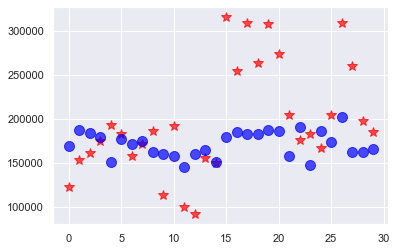

In [27]:
plt.plot(y_pred[:30],alpha=0.7,linestyle='none',marker='*',markersize=10,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(y_test[:30],alpha=0.7,linestyle='none',marker='o',markersize=10,color='blue',label=b'Ridge; $\alpha = 10$',zorder=7)
